In [1]:
# Initialize necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Quick exercise: 
###### o Create a dummy data
###### o Calculate: slope, intercept, r-value, p-vlaue, standard error
###### o Find predicted value based on input data: x

In [2]:
# Dataset
x = np.array([34, 108, 64, 88, 99, 51])
y = np.array([5.00, 17.00, 11.00, 8.00, 14.00, 5.00])
print('X array:', x, '\nY array:', y)

X array: [ 34 108  64  88  99  51] 
Y array: [ 5. 17. 11.  8. 14.  5.]


In [3]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print('Slope:', slope, '\nIntercept:', intercept, '\nR Value:', r_value, '\nP Value:', p_value, '\nStandard Error:', std_err)

Slope: 0.14621968616262482 
Intercept: -0.8202567760342365 
R Value: 0.865664999629448 
P Value: 0.02585674101078121 
Standard Error: 0.04228023725471384


In [4]:
# Calculate the predicted y values
predicted_y = slope * x + intercept
print('Predicted values:', predicted_y)

Predicted values: [ 4.15121255 14.97146933  8.53780314 12.04707561 13.65549215  6.63694722]


In [5]:
# Calculate SST, SSR, and SSE
y_mean = np.mean(y)
sst = np.sum((y - y_mean) ** 2)
ssr = np.sum((predicted_y - y_mean) ** 2)
sse = np.sum((y - predicted_y) ** 2)
print('Y Mean:', y_mean, '\nSum of squares total:', sst, '\nSum of squares regression:', ssr, '\nSum of squares error:', sse)

Y Mean: 10.0 
Sum of squares total: 120.0 
Sum of squares regression: 89.92510699001427 
Sum of squares error: 30.074893009985736


### Day 1 Hands on Exercise:
##### Lab Problem: Linear Regression Model Analysis
##### Objective:
##### > Design a simple linear regression model to analyze the relationship b/w Annual Income (k$) and Spending Score (1-100) using the linregress() method. 
##### > Compute and interpret the slope, intercept, coefficient of determination (R-value), p-value, and standard error of the regression model.

In [6]:
# 1.1. Load the given data containing the 'Annual Income' and 'Spending Score'.
path = 'D:\\Downloads\\'
file = 'Mall_Customers.csv'
df = pd.read_csv(path + file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [7]:
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'] ### Rename columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

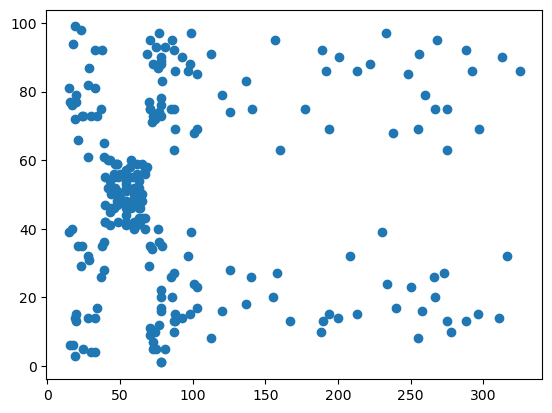

In [8]:
# 1.2. Visualize the data using a scatter plot to observe the relationship between the two parameters.
x = df['AnnualIncome']
y = df['SpendingScore']
plt.scatter(x, y)
plt.show()

In [9]:
# 2.1. Use the linregress() method from the scipy.stats library to compute the linear regression model.
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [10]:
# 2.2. Extract the following components from the regression analysis:
# 	2.2.1 Slope (m): The rate of change in the Spending Score with respect to Annual Income.
# 	2.2.2 Intercept (c): The Spending Score when Annual Income is 0.
# 	2.2.3 R-value (Coefficient of Determination): A measure of how well the linear model fits the data.
# 	2.2.4 P-value: The significance of the relationship between Annual Income and Spending Score.
# 	2.2.5 Standard Error: The standard deviation of the slope
print('Slope:', slope, '\nIntercept:', intercept, '\nR Value:', r_value, '\nP Value:', p_value, '\nStandard Error:', std_err)

Slope: 0.004004132864224445 
Intercept: 49.861236931243056 
R Value: 0.011343184761743928 
P Value: 0.8583629786234614 
Standard Error: 0.022414016719240225


In [11]:
# 3.1 Interpret the computed slope and intercept in the context of the problem.
print(('Slope value of %f means that there is a mildly positive correlation between annual income & spending score (measure of customer spending \
behavior). \nOn average, for every thousands of dollars a customer spends, their spending score marginally increases by 4 percent.')%(slope))
print(('\nIntercept value of %f indicates the base value of spending score. If there is no annual income, spending score is roughly 50/100')%(intercept))

Slope value of 0.004004 means that there is a mildly positive correlation between annual income & spending score (measure of customer spending behavior). 
On average, for every thousands of dollars a customer spends, their spending score marginally increases by 4 percent.

Intercept value of 49.861237 indicates the base value of spending score. If there is no annual income, spending score is roughly 50/100


In [12]:
# 3.2 Explain the significance of the R-value and p-value based on the computed results.
if p_value > 0.05:
    print(('P-value of %f is high => model insignificant => change in annual income unrelated to spending score')%(p_value))
else:
    print(('P-value of %f is low => model significant => change in annual income largely influences spending score')%(p_value))
print()
if r_value <= -0.7 or r_value >= 0.7:
    print(('R-value of %f has high correlation => proportion of variance in annual income can be explained by the spending score')%(r_value))
else:
    print(('R-value of %f has low correlation => proportion of variance in annual income can\'t be explained by the spending score')%(r_value))

P-value of 0.858363 is high => model insignificant => change in annual income unrelated to spending score

R-value of 0.011343 has low correlation => proportion of variance in annual income can't be explained by the spending score


In [13]:
# 3.3 Comment on the standard error and its impact on the reliability of the model.
if std_err >= 0.5:
    print(('The standard error of %f is high; sample data doesn\'t represent actual data closely')%(std_err))
else:
    print(('The standard error of %f is low; sample data represents actual data closely')%(std_err))

The standard error of 0.022414 is low; sample data represents actual data closely


In [14]:
# 4.1 Use the computed regression equation to predict Spending Scores for given Annual Income values (e.g., $30k, $70k, $100k).
predicted_y = slope * x + intercept
df['PredictedSpendingScore'] = predicted_y
df[['PredictedSpendingScore']].sample(5)

,PredictedSpendingScore
176,50.213601
229,50.886295
79,50.077460
221,50.794200
212,50.638039


In [15]:
# 4.2 Compare the predictions with actual data points.
df['PredictedSpendingScoreInt'] = df['PredictedSpendingScore'].round().astype('int64')
print('Annual Income and Predicted vs actual values for spending score:\n')
df[['AnnualIncome', 'SpendingScore', 'PredictedSpendingScoreInt']].sample(5)

Annual Income and Predicted vs actual values for spending score:



,AnnualIncome,SpendingScore,PredictedSpendingScoreInt
63,47,59,50
109,63,48,50
75,54,54,50
149,78,90,50
104,62,56,50


In [16]:
# y_mean = np.mean(y) ### Mean of actual spending score values
# sst = np.sum((y - y_mean) ** 2) ### Difference between actual & predicted values of spending score (residual)
# ssr = np.sum((predicted_y - y_mean) ** 2) ### Squares of differences b/w predicted spending score values & mean of actual spending score values
# sse = np.sum((y - predicted_y) ** 2) ### Squares of differences b/w actual spending score & predicted spending score
# print('Y Mean:', y_mean, '\nSum of squares total:', sst, '\nSum of squares regression:', ssr, '\nSum of squares error:', sse)

In [17]:
# ssr/sst ### Checking R-squared value again

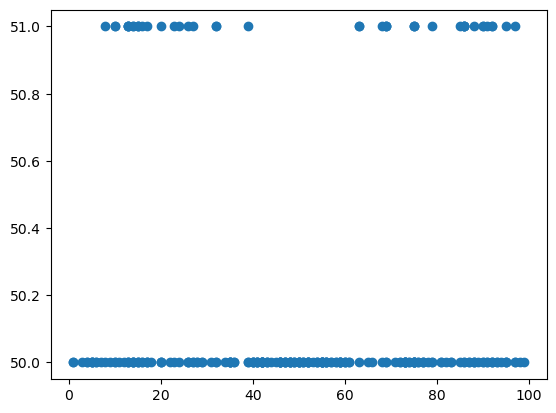

In [18]:
# 5.1 Plot the regression line along with the data points on a scatter plot.
x = df['SpendingScore']
y = df['PredictedSpendingScoreInt']
plt.scatter(x, y)
plt.show()

In [19]:
# 5.2 Highlight key points such as the predicted values and their actual counterparts.
print(df['PredictedSpendingScoreInt'].value_counts())
print('\nThe predicted spending scores are all very similar, distributed between 50 and 51. Stark difference to the actual values.')

PredictedSpendingScoreInt
50    205
51     45
Name: count, dtype: int64

The predicted spending scores are all very similar, distributed between 50 and 51.
